In [1]:
from main import people_merged
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', 10)

In [2]:
df = people_merged()
display(df)

====== Running pipeline PeopleMerged =====
Initializing people_krs PeopleKRSMerged
  ====== Running pipeline PeopleKRSMerged =====
Initializing people_krs PeopleKRS
    ====== Running pipeline PeopleKRS =====
Finished initialization
Reading LocalFile(filename='person_krs.jsonl', folder='versioned')
Writing to /Users/szymonpajzert/Programming/koryta/data/scrapers/versioned/person_krs.jsonl
Finished processing
Dumping...
Done
    ====== Finished pipeline PeopleKRS =====


Finished initialization
Reading LocalFile(filename='people_krs_merged.jsonl', folder='versioned')
Writing to /Users/szymonpajzert/Programming/koryta/data/scrapers/versioned/people_krs_merged.jsonl
Finished processing
Dumping...
Done
  ====== Finished pipeline PeopleKRSMerged =====


Finished initialization
Reading LocalFile(filename='people_merged.jsonl', folder='versioned')
Writing to /Users/szymonpajzert/Programming/koryta/data/scrapers/versioned/people_merged.jsonl
Finished processing
Dumping...
Done
====== Finished 

,index,mistake_odds,unique_chance,overall_score,koryta_name,krs_name,pkw_name,wiki_name,birth_year,birth_date,employment,is_polityk,base_first_name,base_last_name,birth_date_1,metaphone,max_score,overall_score_1,metaphone_1,krs_name_1,pkw_name_1,birth_year_1,base_first_name_1,base_last_name_1,base_full_name,birth_date_2,employment_1,kp_same_birth_year,elections,unique_chance_1,first_name,last_name,second_name,metaphone_1_1,birth_year_2,employment_3,rejestrio_id,full_name,birth_date_4,first_name_5,last_name_6,second_name_7,metaphone_8,birth_year_9,elections_10,full_name_11,teryt_wojewodztwo,teryt_powiat,first_name_12,count,p,first_name_13,count_14,p_15,last_name_16,count_17,teryt,wiki_name_1,is_polityk_1,wiki_score,koryta_name_1,history,election_before_work,first_employed,last_employed,employed_total,parties_simplified
0,1456,5585.811329,0.999821,14.0,NaN,Andrzej Jacek Kopczyński,KOPCZYŃSKI Andrzej Jacek,None,1972,1972-07-03,"[{'employed_krs': 104622, 'employed_end': '202...",NaN,andrzej,kopczyński,1972-07-03,"[KPSSK, KPXSK]",14.0,14.0,"[KPSSK, KPXSK]",Andrzej Jacek Kopczyński,KOPCZYŃSKI Andrzej Jacek,1972,andrzej,kopczyński,[Andrzej Jacek Kopczyński],1972-07-03,"[{'employed_krs': 104622, 'employed_end': '202...",1.0,"[{'party': 'KWW KO TRZECIA DROGA LUBUSKIE', 'e...",0.999821,andrzej,kopczyński,jacek,"[KPSSK, KPXSK]",1972,"[{'employed_krs': 104622, 'employed_end': '202...",[1248879],[Andrzej Jacek Kopczyński],1972-07-03,andrzej,kopczyński,jacek,"[KPSSK, KPXSK]",1972.0,"[{'party': 'KWW KO TRZECIA DROGA LUBUSKIE', 'e...",[KOPCZYŃSKI Andrzej Jacek],[08],[0812],andrzej,523382.0,1.192453e-02,jacek,229212.0,0.005222,kopczyński,115.0,8.0,None,NaN,NaN,NaN,Pracuje od 1978-08-02 do 2025-12-03 w 104622\n...,-1.433203e+12,270864000000,2025-12-03,1493860320000,[]
1,1254,9446.247084,0.999894,14.0,NaN,Jacek Andrzej Rosiak,ROSIAK Jacek Andrzej,None,1977,1977-03-10,"[{'employed_krs': 118779, 'employed_end': '202...",NaN,jacek,rosiak,1977-03-10,[RSK],14.0,14.0,[RSK],Jacek Andrzej Rosiak,ROSIAK Jacek Andrzej,1977,jacek,rosiak,[Jacek Andrzej Rosiak],1977-03-10,"[{'employed_krs': 118779, 'employed_end': '202...",1.0,"[{'party': 'KWW GMINA BIAŁA PODLASKA', 'electi...",0.999894,jacek,rosiak,andrzej,[RSK],1977,"[{'employed_krs': 118779, 'employed_end': '202...",[1070563],[Jacek Andrzej Rosiak],1977-03-10,jacek,rosiak,andrzej,[RSK],1977.0,"[{'party': 'KWW GMINA BIAŁA PODLASKA', 'electi...",[ROSIAK Jacek Andrzej],[06],[0601],jacek,229212.0,5.222277e-03,andrzej,523382.0,0.011925,rosiak,68.0,6.0,None,NaN,NaN,NaN,Pracuje od 1998-04-17 do 2020-09-07 w 118779\n...,-8.112960e+11,892771200000,2020-09-07,706721760000,[]
2,4057,33.340797,0.970007,12.0,NaN,Tadeusz Kokoszka,KOKOSZKA Tadeusz,None,1951,1951-10-02,"[{'employed_krs': 64238, 'employed_end': '2009...",NaN,tadeusz,kokoszka,1951-10-02,"[KKSK, KKXK]",12.0,12.0,"[KKSK, KKXK]",Tadeusz Kokoszka,KOKOSZKA Tadeusz,1951,tadeusz,kokoszka,[Tadeusz Kokoszka],1951-10-02,"[{'employed_krs': 64238, 'employed_end': '2009...",0.0,"[{'party': 'KWW „NASZA GMINA SOMIANKA""', 'elec...",0.970007,tadeusz,kokoszka,None,"[KKSK, KKXK]",1951,"[{'employed_krs': 64238, 'employed_end': '2009...",[1675286],[Tadeusz Kokoszka],1951-10-02,tadeusz,kokoszka,None,"[KKSK, KKXK]",1952.0,"[{'party': 'KWW „NASZA GMINA SOMIANKA""', 'elec...",[KOKOSZKA Tadeusz],[14],[1435],tadeusz,192239.0,4.379899e-03,None,NaN,NaN,kokoszka,277.5,14.0,None,NaN,NaN,NaN,Pracuje od 1998-08-02 do 2009-01-21 w 64238\nK...,-8.020512e+11,902016000000,2009-01-21,330497280000,[]
3,1038,16919.698688,0.999941,14.0,NaN,Tomasz Feliks Pawelec,Pawelec Tomasz Feliks,None,1959,1959-03-23,"[{'employed_krs': 12907, 'employed_end': '2017...",NaN,tomasz,pawelec,1959-03-23,[PLK],14.0,14.0,[PLK],Tomasz Feliks Pawelec,Pawelec Tomasz Feliks,1959,tomasz,pawelec,[Tomasz Feliks Pawelec],1959-03-23,"[{'employed_krs': 12907, 'employed_end': '2017...",1.0,[{'party': 'KOMITET WYBORCZY WYBORCÓW KOCHAM R...,0.999941,tomasz,pawelec,feliks,[PLK],1959,"[{'employed_krs': 12907, 'employed_end': '2017.

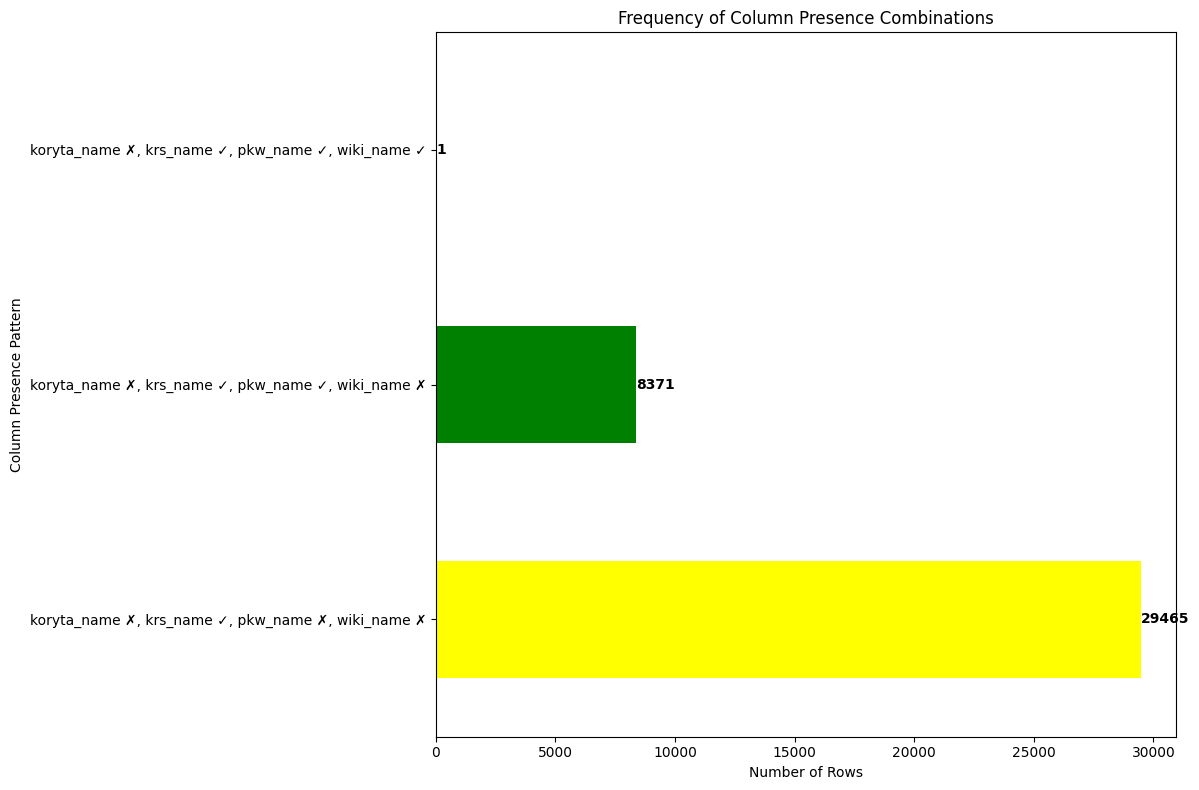

In [3]:
columns_to_check = ['koryta_name', 'krs_name', 'pkw_name', 'wiki_name']

combination_counts = df[columns_to_check].notnull().groupby(columns_to_check).size()
combination_counts = combination_counts.sort_values(ascending=False)

bar_colors = []

# 3. Format the index for better plotting
# We'll turn the boolean index (e.g., (True, False, True, False)) into a readable string
def format_label(combo_tuple, column_names):
    parts = []
    for name, is_present in zip(column_names, combo_tuple):
        # Use checkmarks and crosses for visual clarity
        symbol = '✓' if is_present else '✗'
        parts.append(f'{name} {symbol}')
    # koryta, krs, pkw, wiki
    color = {
        (True, True, True, True): "green",
        (True, True, True, False): "green",
        (True, True, False, True): "green",
        (True, True, False, False): "green",
        (False, True, True, True): "green",
        (False, True, True, False): "green",
        (False, True, False, True): "yellow",
        (False, True, False, False): "yellow",
    }.get(combo_tuple, "#a133ff")
    bar_colors.append(color)
    return ', '.join(parts)

# The index of our Series is a MultiIndex, so we access its values
new_labels = [format_label(combo, columns_to_check) for combo in combination_counts.index]
combination_counts.index = new_labels

# 4. Create the plot
plt.figure(figsize=(12, 8))
# A horizontal bar chart is often best for many categories with long labels
ax = combination_counts.plot(
    kind='barh',
    color=bar_colors,
    title='Frequency of Column Presence Combinations'
)

ax.set_xlabel("Number of Rows")
ax.set_ylabel("Column Presence Pattern")

# Add the count labels next to the bars for clarity
for i, v in enumerate(combination_counts):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontweight='bold')


plt.tight_layout()
plt.show()

In [4]:
import pandas as pd

color_df = pd.DataFrame({
    'count': combination_counts,
    'color': bar_colors
})

# 2. Aggregate the counts by color
aggregated_counts = color_df.groupby('color').sum()
aggregated_counts['label'] = ['Good already', 'Needs work'] # Create readable labels
aggregated_counts = aggregated_counts.set_index('label') # Use labels for the pie chart
aggregated_counts

,count
label,
Good already,8372
Needs work,29465


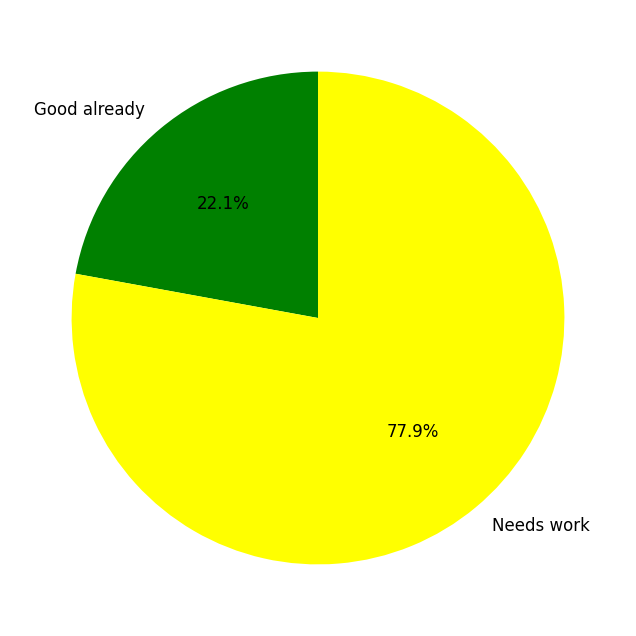

In [5]:
plt.figure(figsize=(8, 8))
aggregated_counts['count'].plot(
    kind='pie',
    colors=['green', 'yellow'], # Use the group colors for the slices
    autopct='%1.1f%%',         # Format to show percentages with one decimal place
    startangle=90,             # Rotate the pie chart for better alignment
    fontsize=12,
)

plt.ylabel('') # This removes the default 'count' label from the side of the pie chart
plt.show()